In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load data generated previously from 'titanic_filtered.csv'

df = pd.read_csv(r'titanic_filtered.csv')
df.head()
df.drop('Unnamed: 0' , axis = 1 , inplace = True) 
df.shape

(1307, 8)

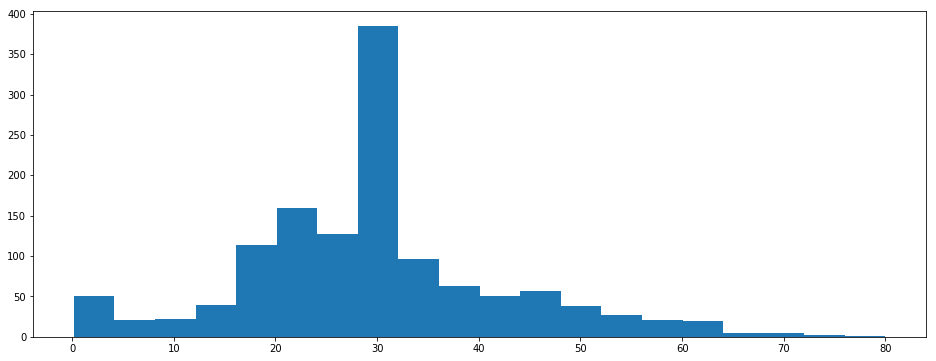

In [3]:
# plot histogram of ages of people


#Using matplotlib
plt.figure(figsize   = (16,6))
plt.hist(df.age , bins = 20)
plt.show()

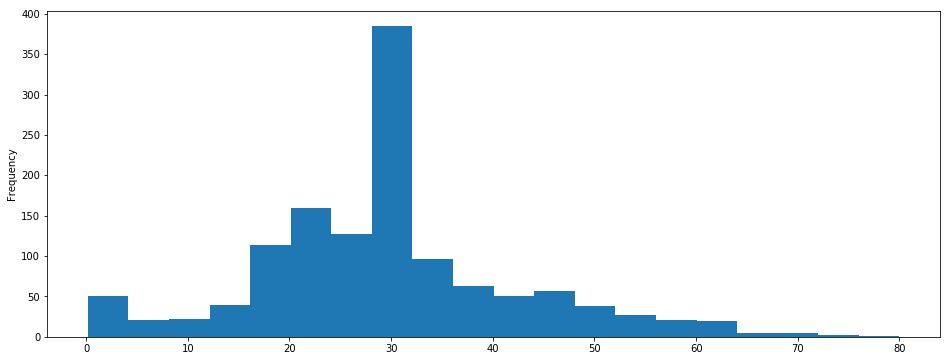

In [4]:
#Using Pandas
df.age.plot(kind = 'hist' ,  bins = 20, figsize = (16,6))

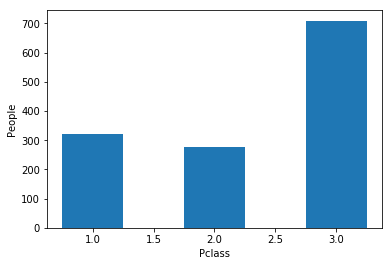

In [5]:
# plot no of people in each pclass on bar chart

#Using matplotlib
s = df.groupby('pclass' ).survived.count()
plt.bar(s.index , s.values , width = 0.5)
plt.xlabel('Pclass')
plt.ylabel('People')
plt.show()


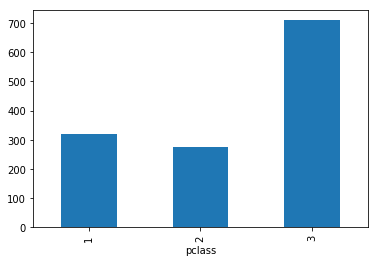

In [6]:
#Using Pandas

s.plot(kind = 'bar')
plt.show()

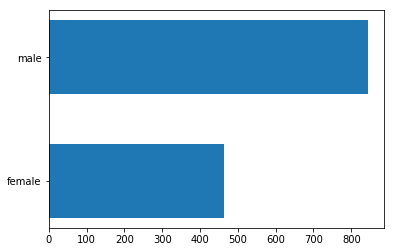

In [7]:
# plot a horizontal bar-chart depicting the ratio of males to females

s = df.groupby('gender').gender.count()
#Using matplotlib

plt.barh(s.index , s.values, height = 0.6)
plt.show()

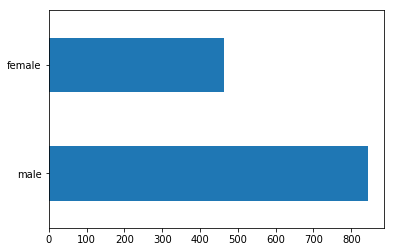

In [8]:
#Using Pandas

df.gender.value_counts().plot(kind = 'barh')

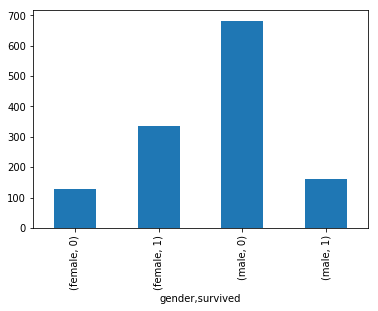

In [9]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.

# s = df.pivot_table(index = ['gender' , 'survived' ], values = ['pclass'], aggfunc = np.sum)

#Using Pandas
s = df.groupby(['gender', 'survived']).survived.count()
# plt.bar(s.index , s.values)
s.plot(kind = 'bar')


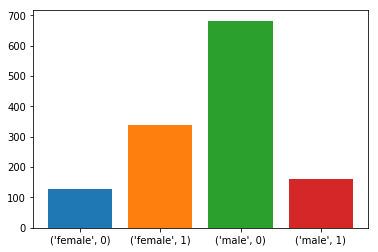

In [10]:
#Using Matplolib

s = df.groupby(['gender', 'survived']).groups.keys()
# for data in s.groups:
#     print(data, len(s.get_group(data)))

for data in s:
    plt.bar(str(data) , len(df.groupby(['gender', 'survived']).get_group(data)))


# df.groupby(['gender', 'survived']).survived.count()
plt.show()

survived,0,1
gender,,
female,127,337
male,682,161


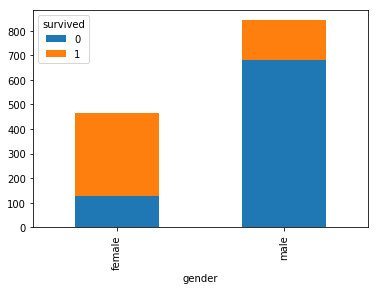

In [11]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.

#Using Pandas

s = df.groupby(['gender', 'survived']).size()  #Note use size()
s = s.unstack(level = 1)
s.plot(kind = 'bar' , stacked = True)

s

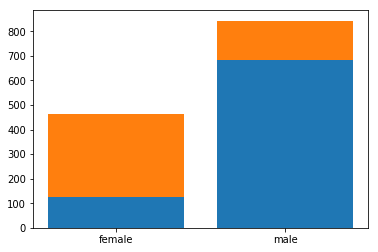

In [12]:
#Using Matplotlib

s = df.groupby(['gender', 'survived']).size()  #Note use size()
s = s.unstack(level = 1)
s

bottom = pd.Series(np.zeros(s.index.size))
for i in s.columns:
    plt.bar(s.index , s[i].values , bottom = bottom)
    bottom += s[i].values


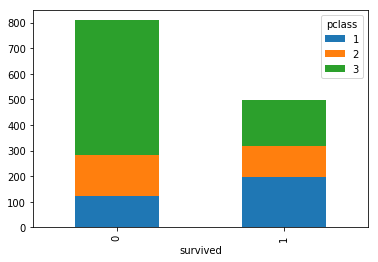

In [13]:
# plot stacked bar of survived with different pclass in same bar.


#Using pandas

s = df.groupby(['pclass', 'survived']).size().unstack(level = 0)
s.plot(kind = 'bar' , stacked = True)
plt.show()

#Note the difference in outut and order when arguments are passed in different order

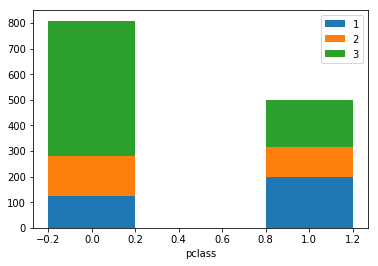

In [14]:
#Using matplotlib

bottom = pd.Series(np.zeros(s.index.size))
for i in s.columns:
    plt.bar(s.index , s[i].values , bottom = bottom , width = 0.4 , label = i)
    bottom += s[i].values
plt.xlabel('pclass')
plt.legend()
plt.show()

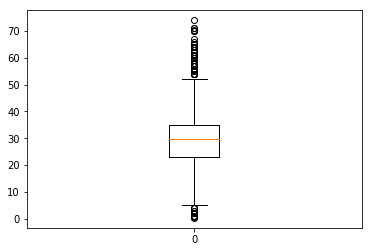

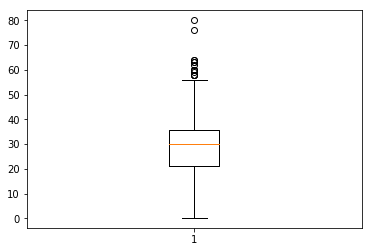

In [15]:
# plot box plot of ages of survived vs not-survived

#Using Pandas

s = df.groupby('survived')
for keys in s.groups:
    plt.boxplot(s.get_group(keys).age , labels = [keys])
    plt.show()
 

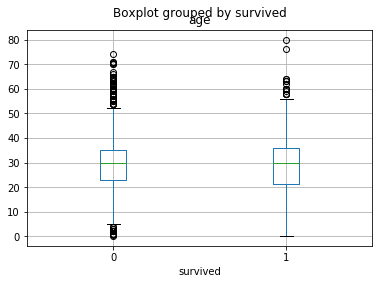

In [16]:
#Using Pandas

df.boxplot(column = 'age' , by = 'survived')
plt.show()


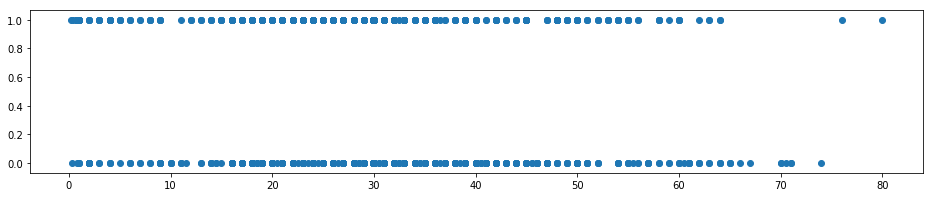

In [17]:
# plot scatter plot of ages vs survived.

#Using matplotlib
plt.figure(figsize = (16,3))
plt.scatter(df.age , df.survived )
plt.show()

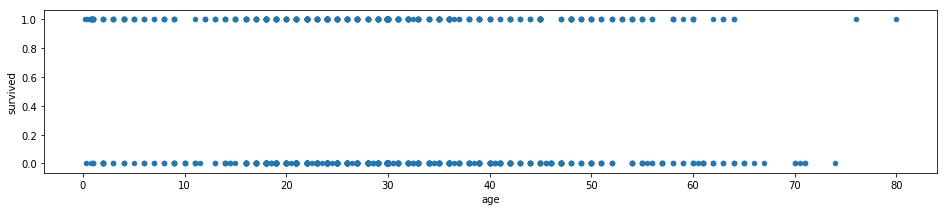

In [18]:
#Using pandas

df.plot.scatter(x = 'age' , y = 'survived' , s = 20, figsize = (16,3))